In [1]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



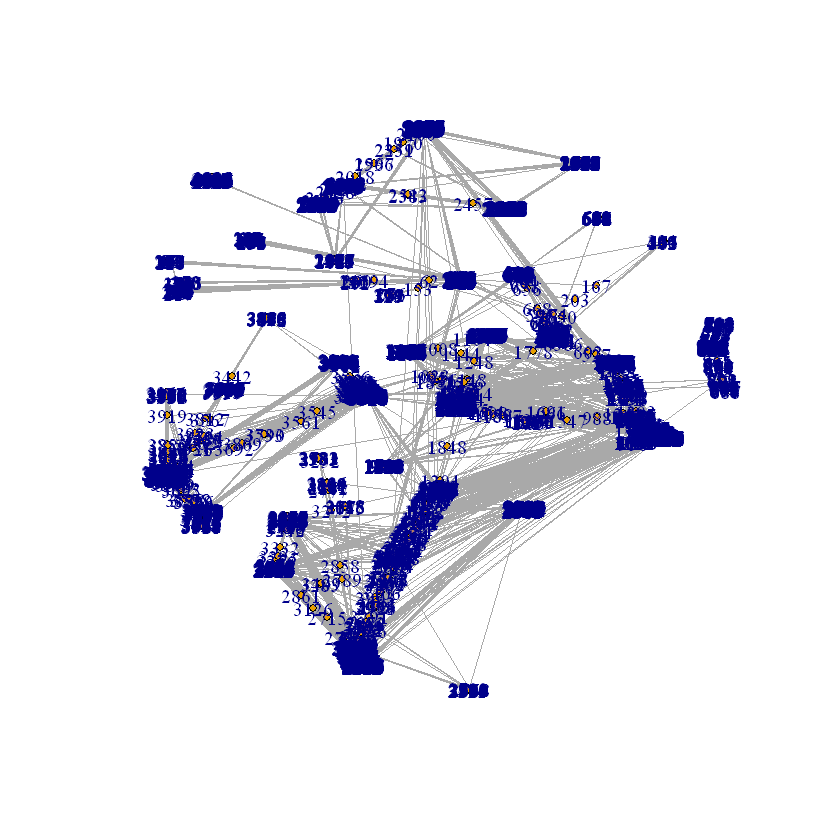

In [2]:
graph<-read.graph("facebook_combined.txt",directed=F)
g=graph
plot(g,vertex.size=3)
V(g)$vid <- seq(1,vcount(g))

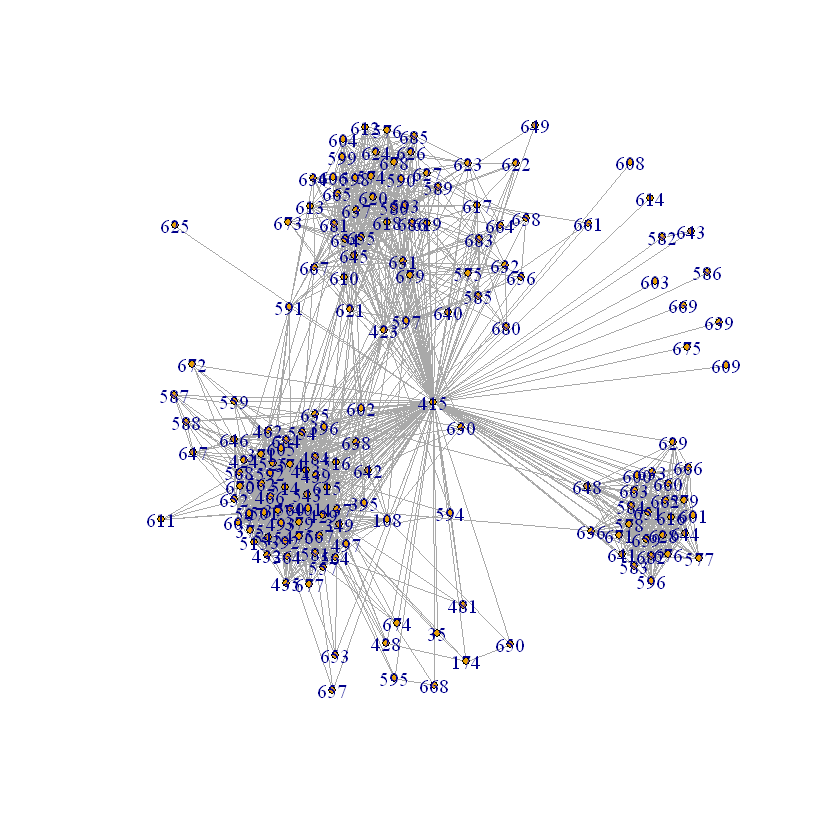

In [3]:
#Q16
n415 <- ego(g, 1, 415)
i415 <- n415[[1]]
g415<- induced_subgraph(g, vids=i415, impl = c("auto"))
plot(g415,vertex.size=3,vertex.label=V(g415)$vid)

In [4]:
D=degree(g415)
c=1
c1=0
Nr=c()
for (i in i415){
    c1=c1+1
    if (D[c1]==24){
        Nr[c]=i
        c=c+1
    }  
}
print(Nr)
print(i415)

 [1] 497 579 601 616 619 628 644 659 660 662 663
+ 160/4039 vertices, from b656962:
  [1] 415  35 108 174 349 364 371 374 375 377 379 392 395 396 401 413 423 424
 [19] 428 429 432 435 437 439 462 466 476 481 484 493 497 501 507 514 515 516
 [37] 525 543 545 554 557 559 560 562 564 567 568 574 575 576 577 578 579 580
 [55] 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598
 [73] 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616
 [91] 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634
[109] 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652
[127] 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670
[145] 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686


In [5]:
newi<-seq(from=1,to =160)

In [6]:
#Q17
aaucCN=c()
aaucJAC=c()
aaucAA=c()
ai=1
for (ir in Nr){
    aucCN=c()
    aucJAC=c()
    aucAA=c()
    for (a in 1:10){
        g1=g415
        i=which(i415==ir)
        ni<- neighbors(g1, i)
        m=1
        Ri=c()
    #    print(length(j))
    #denote the list of friends deleted as Ri    
        for (c in ni){
            r<-sample(1:1000,1)
            if(r<=250){
                g1 <- delete_edges(g1, E(g1, P=c(i,c)))
                Ri[m]=i415[c]
                m=m+1
            }
        }
    # denote the list of friends recommended as Pi
        newni<-neighbors(g1, i)
        j<- newi[!newi %in% newni]
        j<- j[!j %in% i]
        t=length(Ri)
        PiCN=c()
        PiJAC=c()
        PiAA=c()
        CN=c()
        JAC=c()
        AA=c()
        i1=1
        for (j1 in j){
            nj<-neighbors(g1, j1)
            CN[i1]=length(intersect(ni,nj))
            JAC[i1]=length(intersect(ni,nj))/length(union(ni,nj))
            AAA=0
            for (AAi in intersect(ni,nj)){
                nAA<- neighbors(g1, AAi)
                AAA=AAA+1/log(length(nAA))
            }
            AA[i1]=AAA
            i1=i1+1
        }
#        print(CN)
#        print(JAC)
#        print(AA)
        for (t1 in 1:t){
            PiCN[t1]=i415[j[which.max(CN)]]
            PiJAC[t1]=i415[j[which.max(JAC)]]
            PiAA[t1]=i415[j[which.max(AA)]]
            CN[which.max(CN)]=0 
            JAC[which.max(JAC)]=0 
            AA[which.max(AA)]=0 
        }
        print(Ri)
        print(PiCN)
        print(PiJAC)
        print(PiAA)
        aucCN[a]=length(intersect(PiCN,Ri))/length(Ri)
        aucJAC[a]=length(intersect(PiJAC,Ri))/length(Ri)
        aucAA[a]=length(intersect(PiAA,Ri))/length(Ri)
    }
#    print(auc)
#    print(sum(auc))
    aaucCN[ai]=sum(aucCN)/10
    aaucJAC[ai]=sum(aucJAC)/10
    aaucAA[ai]=sum(aucAA)/10
    ai=ai+1
}
maaucCN=sum(aaucCN)/length(Nr)
maaucJAC=sum(aaucJAC)/length(Nr)
maaucAA=sum(aaucAA)/length(Nr)
print(aaucCN)
print(maaucCN)
print(aaucJAC)
print(maaucJAC)
print(aaucAA)
print(maaucAA)

Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 371 375 413 437 484 514 642
[1] 413 493 371 560 375 396 484
[1] 349 493 379 560 396 432 501
[1] 413 493 371 560 396 514 484


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 371 377 428 554
[1] 493 371 560 377
[1] 349 493 379 560
[1] 493 371 560 377


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 515 516 554 592 642
[1] 493 560 396 379 592
[1] 349 493 379 560 396
[1] 493 560 396 592 429


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 174 476 507 516 592 642
[1] 493 560 396 379 592 349
[1] 349 493 379 560 396 432
[1] 493 560 396 592 429 379


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 377 428 567 592 638
[1] 493 560 377 396 379
[1] 349 493 379 567 560
[1] 493 560 377 396 429


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

 [1] 174 371 413 435 484 507 515 516 567 638
 [1] 413 493 371 560 396 484 379 567 349 429
 [1] 349 493 379 567 560 396 432 516 501 525
 [1] 413 493 371 560 396 484 429 567 379 174


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 174 374 413 439 476 484 514 554
[1] 413 493 560 396 484 514 379 349
[1] 349 493 379 560 396 432 501 525
[1] 413 493 560 396 514 484 429 379


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 174 371 374 377 401 428 515 670
[1] 493 371 560 377 396 379 349 429
[1] 349 493 379 560 377 396 432 501
[1] 493 371 560 377 396 429 379 174


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 174 374 401 413 476 567 581
[1] 413 493 560 396 379 567 349
[1] 349 493 379 567 560 396 432
[1] 413 493 560 396 429 567 379


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 174 371 374 437 554 567
[1] 493 371 560 396 379 567
[1] 349 493 379 567 560 396
[1] 493 371 560 396 429 567


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 628 636 644
[1] 628 644 636
[1] 628 644 636
[1] 628 644 636


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 584 596 600 633 666 676
[1] 413 584 676 600 633 596 666
[1] 584 676 600 633 596 666 629
[1] 413 584 676 600 633 596 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 600 660 663 666
[1] 660 663 600 666 577
[1] 660 663 600 666 577
[1] 660 663 600 666 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 578 636 648 651 663 676
[1] 663 676 578 651 636 648
[1] 676 663 578 651 636 648
[1] 676 663 651 578 636 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 596 600 601 616 636 641 660 676 682
[1] 660 601 616 641 676 600 682 636 596
[1] 660 641 676 601 616 600 682 636 596
[1] 660 616 676 601 641 682 600 636 596


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 628 644 651 659 663
[1] 628 659 644 663 651
[1] 628 659 644 663 651
[1] 628 659 644 663 651


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 584 596 636 648 671 682
[1] 584 671 682 636 596 648 577
[1] 584 671 682 636 596 648 577
[1] 584 671 682 636 596 648 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 583 584 596 659 662 671 676 682
[1] 584 659 662 671 676 682 583 596
[1] 659 584 671 676 662 682 583 596
[1] 584 659 676 662 671 682 583 596


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 600 601 636 644
[1] 601 644 600 636 577
[1] 601 644 600 636 577
[1] 601 644 600 636 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 578 628 644 663
[1] 628 644 663 578
[1] 628 644 663 578
[1] 628 644 663 578


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 596 641 651 663 682
[1] 663 641 682 651 596
[1] 663 641 682 651 596
[1] 663 682 641 651 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 596 616 629 633 636 651 663 671
[1] 616 663 671 633 636 651 596 648
[1] 616 663 671 633 636 651 596 648
[1] 616 663 671 633 651 636 648 596


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 600 633 682
[1] 600 682 633
[1] 600 682 633
[1] 682 600 633


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 579 583 600 616 628 633 641 666
[1] 579 616 628 600 641 583 633 648
[1] 579 616 628 600 641 583 633 648
[1] 616 579 628 600 641 633 583 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 579 629 633 636 644 660 663 666 671
[1] 644 579 660 663 671 633 636 648 666
[1] 644 579 660 663 671 633 636 648 666
[1] 644 663 579 660 671 633 636 648 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

 [1] 577 578 579 583 616 633 636 641 660 676 682
 [1] 579 616 660 641 676 682 578 583 633 636 648
 [1] 579 616 660 641 676 682 583 578 633 636 648
 [1] 616 579 660 682 676 641 633 578 636 583 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 579 584 644 663 666 671 676
[1] 584 644 579 663 671 676 648
[1] 644 584 579 663 671 676 648
[1] 584 644 663 579 676 671 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 578 600 628 641 663
[1] 628 663 600 641 578
[1] 628 663 600 641 578
[1] 663 628 600 641 578


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 584 633 636 676
[1] 584 676 633 636
[1] 584 676 633 636
[1] 584 676 633 636


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 641 659 662
[1] 662 659 641
[1] 662 659 641
[1] 662 659 641


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 577 584 600 641 659 676 682
[1] 413 584 651 659 676 600 641 682
[1] 584 651 676 659 600 641 682 577
[1] 413 584 659 651 676 682 600 641


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 579 600 629 636 641 660 666 676
[1] 579 651 660 676 600 641 636 666 577
[1] 651 676 579 660 600 641 636 666 577
[1] 579 660 651 676 600 641 636 666 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 584 596 601 660 682
[1] 584 601 651 660 682
[1] 584 651 601 660 682
[1] 584 601 651 660 682


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 596 600 601 628 633 636 662 676 682
[1] 601 628 651 662 676 600 682 633 636
[1] 651 676 601 628 662 600 682 633 636
[1] 662 601 628 651 676 682 600 633 636


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 583 596 641 644 676
[1] 644 651 676 641 583
[1] 651 676 644 641 583
[1] 644 651 676 641 583


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 663 666 676
[1] 651 663 676 666
[1] 651 676 663 666
[1] 663 651 676 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 579 596 662 666
[1] 413 579 651 662 596
[1] 651 579 662 596 666
[1] 413 662 579 651 596


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 584 628 641 648 659 660
[1] 584 628 651 659 660 641
[1] 584 651 628 659 660 641
[1] 584 628 651 659 660 641


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 583 596 601 641 659 662 666
[1] 601 651 659 662 641 583 596
[1] 651 601 659 662 641 583 596
[1] 601 662 651 659 641 583 596


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 644 682
[1] 644 651 682
[1] 651 644 682
[1] 644 651 682


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 589 617 632 654 667 685
[1] 580 654 655 610 678 626
[1] 654 580 678 626 655 685
[1] 580 654 655 678 610 626


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 593 598 654
[1] 593 580 654
[1] 654 593 580
[1] 593 580 654


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 423 631 654 680 681 685
[1] 413 580 631 654 655 423 610
[1] 654 631 580 678 626 655 681
[1] 413 631 580 654 655 423 681


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 599 634 654 686
[1] 580 654 655 610
[1] 654 580 678 686
[1] 580 654 655 678


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 593 599 612 632 654 680 686
[1] 413 593 580 654 655 610 678 626
[1] 654 593 580 678 686 626 655 645
[1] 413 593 580 654 655 678 610 626


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 585 589 679 685 686
[1] 580 655 679 610 678
[1] 679 580 678 686 626
[1] 580 679 655 678 610


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 599 617 637 667
[1] 413 580 637 655 610
[1] 637 580 678 626 655
[1] 413 580 637 655 678


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 589 617 667 680 683
[1] 413 580 655 610 678 626
[1] 580 678 626 655 683 645
[1] 413 580 655 678 610 626


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 589 634 679 683
[1] 413 580 655 679 610
[1] 679 580 678 626 634
[1] 413 580 679 655 678


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 423 593 632 637 654
[1] 593 580 654 637 655
[1] 637 654 593 580 678
[1] 593 580 654 637 655


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

 [1] 578 584 600 601 633 641 648 660 663 666 676 682
 [1] 584 660 601 641 663 676 578 600 682 633 648 666
 [1] 660 584 641 676 601 663 578 600 682 633 666 648
 [1] 584 660 676 601 641 663 682 600 578 633 648 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 578 579 616 644 648 671
[1] 413 579 616 644 671 578 648
[1] 579 671 616 644 578 648 629
[1] 413 579 616 644 671 578 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 584 616 659
[1] 413 584 659 616
[1] 659 584 616 629
[1] 413 584 659 616


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 578 579 659 676
[1] 579 659 676 578 577
[1] 579 659 676 578 577
[1] 579 659 676 578 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 578 596 648 651 662
[1] 662 578 651 596 648 577
[1] 662 578 651 596 648 577
[1] 662 651 578 596 648 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 636 659 663 671
[1] 413 659 663 671 636
[1] 659 671 663 636 629
[1] 413 659 663 671 636


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 578 579 584 660 662 666 671 682
[1] 413 579 584 660 662 671 578 682 666
[1] 579 660 584 671 662 578 682 666 629
[1] 413 584 579 660 662 671 682 578 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

 [1] 577 578 579 583 633 636 648 659 660 666 676
 [1] 579 659 660 676 578 583 633 636 648 666 577
 [1] 579 659 660 676 578 583 633 636 666 648 577
 [1] 579 659 660 676 578 633 636 583 648 666 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 584 601 633 659 676
[1] 413 584 659 601 676 633
[1] 659 584 676 601 633 629
[1] 413 584 659 676 601 633


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 583 648 659 671
[1] 659 671 583 648
[1] 659 671 583 648
[1] 659 671 583 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 578 600 616 641 660
[1] 616 660 600 641 578
[1] 616 660 600 641 578
[1] 616 660 600 641 578


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 577 579 583 584 596 628 676
[1] 413 584 579 628 676 583 596 648
[1] 584 579 628 676 583 596 648 577
[1] 413 584 579 628 676 583 648 596


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 583 584 616 628 633 641 659
[1] 584 616 628 659 641 583 633 648
[1] 584 616 628 659 641 583 633 648
[1] 584 616 659 628 641 633 583 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 578 629 660
[1] 660 578 648
[1] 660 578 648
[1] 660 578 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 579 629 633 636 663 666 671
[1] 579 663 671 633 636 648 666
[1] 579 663 671 633 636 648 666
[1] 663 579 671 633 636 648 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 579 629 636 660 671 676
[1] 579 660 671 676 636 648
[1] 579 660 671 676 636 648
[1] 579 660 676 671 636 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 578 579 636 662 663 666 682
[1] 413 662 579 663 682 578 636 648
[1] 662 579 663 682 578 636 648 666
[1] 413 662 663 579 682 636 578 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 583 600 601 633 636 660 662
[1] 601 662 660 600 583 633 636
[1] 601 662 660 600 583 633 636
[1] 601 662 660 600 633 636 583


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 583 600 641 663 671
[1] 663 600 641 671 583 648
[1] 663 600 641 671 583 648
[1] 663 600 641 671 583 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 633 636 660 671
[1] 660 671 633 636
[1] 660 671 633 636
[1] 660 671 633 636


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 601 636 641 660 663
[1] 660 601 641 663 636
[1] 660 641 601 663 636
[1] 660 601 641 663 636


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 596 636 641 648 671 682
[1] 641 671 682 636 596 648
[1] 641 671 682 636 596 648
[1] 641 671 682 636 596 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 616 663 666
[1] 413 616 663 666
[1] 616 663 666 629
[1] 413 616 663 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

 [1] 577 578 584 601 616 628 641 651 663 676
 [1] 584 628 601 616 641 663 676 578 651 577
 [1] 628 584 641 676 601 616 663 578 651 577
 [1] 584 628 616 676 601 641 663 651 578 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 579 596 641
[1] 579 641 596 577
[1] 579 641 596 577
[1] 579 641 596 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 583 596 600 616 644 660 676
[1] 660 616 644 676 600 583 596
[1] 660 676 616 644 600 583 596
[1] 660 616 676 644 600 583 596


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 583 584 641 651 662 663 682
[1] 584 641 662 663 651 682 583 577
[1] 584 641 662 663 651 682 583 577
[1] 584 662 641 663 651 682 583 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 583 584 628 633 636 644 663 676 682
[1] 584 628 644 663 676 682 583 633 636
[1] 628 584 676 644 663 682 583 633 636
[1] 584 628 676 644 663 682 633 636 583


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 644 663 666
[1] 644 663 666
[1] 644 663 666
[1] 644 663 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 596 616 628 633 641 644 660 682
[1] 628 660 616 641 644 682 633 596
[1] 628 660 641 616 644 682 633 596
[1] 628 660 616 644 641 682 633 596


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 583 596 600 601 659 663 666 676
[1] 659 601 663 676 600 583 596 666
[1] 659 676 601 663 600 583 596 666
[1] 659 676 601 663 600 583 596 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 584 596 636 641 662 666
[1] 584 641 662 636 596 666
[1] 584 641 662 636 596 666
[1] 584 662 641 636 596 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

 [1] 413 584 601 628 644 648 651 663 666 671
 [1] 413 584 628 601 644 663 671 651 648 666
 [1] 628 584 671 601 644 663 651 666 648 629
 [1] 413 584 628 644 601 663 671 651 648 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 584 600 663
[1] 584 663 600 577
[1] 584 663 600 577
[1] 584 663 600 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 651 662
[1] 413 662 651
[1] 662 651 629
[1] 413 662 651


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 600 616 636 644 648 651 659
[1] 659 616 644 600 651 636 648 577
[1] 659 616 644 651 600 636 648 577
[1] 659 616 644 651 600 636 648 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

 [1] 579 583 600 601 628 636 662 671 676 682
 [1] 579 628 601 662 671 676 600 682 583 636
 [1] 579 628 671 676 601 662 600 682 583 636
 [1] 579 628 676 601 662 671 682 600 636 583


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 578 583 596 641 644 651 659 662
[1] 659 641 644 662 578 651 583 596
[1] 659 641 644 662 578 651 583 596
[1] 659 644 662 641 651 578 583 596


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 578 644 651 659 666 676
[1] 659 644 676 578 651 666
[1] 659 676 644 578 651 666
[1] 659 676 644 651 578 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 583 616 628 648 662 682
[1] 628 616 662 682 583 648
[1] 628 616 662 682 583 648
[1] 628 616 662 682 583 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 577 600 601 641
[1] 413 601 600 641 648
[1] 601 600 641 648 577
[1] 413 601 600 641 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 584 596 651 671 676
[1] 584 671 676 651 596 648
[1] 584 671 676 651 596 648
[1] 584 676 671 651 648 596


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 596 628 644 671
[1] 644 628 671 596
[1] 644 628 671 596
[1] 644 628 671 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 577 633 636 666
[1] 413 633 636 648 666
[1] 633 636 648 666 577
[1] 413 633 636 648 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 616 628 651 659 666 671
[1] 413 616 628 659 671 651 648
[1] 616 628 659 671 651 648 666
[1] 413 616 659 628 671 651 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 584 601 644 651 671
[1] 413 584 601 644 671 651
[1] 601 644 584 671 651 648
[1] 413 584 644 601 671 651


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 578 579 596 616 660 663
[1] 579 616 660 663 578 596
[1] 579 616 660 663 578 596
[1] 616 663 579 660 578 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 579 583 584 659 660 666
[1] 584 579 659 660 583 648
[1] 584 579 659 660 583 648
[1] 584 579 659 660 583 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 577 579 583 596 600 616 633 644
[1] 644 579 616 600 583 633 596 648
[1] 644 579 616 600 583 633 596 648
[1] 644 616 579 600 633 583 648 596


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 577 579 628 629 641 663 671
[1] 413 579 628 663 641 671 648 577
[1] 579 628 663 641 671 648 577 629
[1] 413 663 579 628 641 671 648 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 584 616 644 660 662 666
[1] 584 616 644 660 662 666
[1] 584 616 644 660 662 666
[1] 584 616 644 662 660 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 579 601 616 633 659 666 682
[1] 579 601 616 659 633 682 666
[1] 579 601 616 659 633 682 666
[1] 616 601 579 659 633 682 666


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 578 579 600 616 641 651 659 660
[1] 579 600 616 659 660 578 641 651
[1] 600 579 616 659 660 578 641 651
[1] 616 600 579 659 660 641 578 651


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 601 628 629 633 648 659 676
[1] 601 628 659 633 676 648 577
[1] 601 628 659 633 676 648 577
[1] 601 628 659 633 676 648 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

 [1] 413 578 579 596 628 641 648 659 660 662 676 682
 [1] 413 579 628 659 660 662 578 641 676 682 596 648
 [1] 579 628 659 660 662 578 641 676 682 596 648 577
 [1] 413 662 579 628 659 660 682 676 641 578 596 648


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 579 601 628 633 644 659 662
[1] 579 601 628 644 659 662 633
[1] 579 601 628 644 659 662 633
[1] 601 644 662 579 628 659 633


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 413 583 601 629 641 676
[1] 413 601 641 676 583 577
[1] 601 641 676 583 577 629
[1] 413 601 676 641 583 577


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 578 636 662 676
[1] 662 578 676 636
[1] 662 578 676 636
[1] 662 676 578 636


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 578 628 636 641 644 651 682
[1] 628 644 578 641 682 636 651
[1] 628 644 578 641 682 636 651
[1] 644 628 682 641 578 651 636


Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Co

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., what = "a vertex", is_fun = is_igraph_vs, :
"Combining vertex/edge sequences from different graphs.
This will not work in future igraph versions"Warning message in parse_op_args(..., wh

[1] 601 633 641 659 662 671 676
[1] 601 659 662 671 633 641 676
[1] 671 601 659 662 633 641 676
[1] 601 662 659 671 633 676 641
 [1] 0.3282143 1.0000000 0.9405123 0.8159921 0.3796429 1.0000000 0.8815476
 [8] 1.0000000 1.0000000 0.8873810 0.9690476
[1] 0.8365762
 [1] 0.08345238 0.98571429 0.94051227 0.81599206 0.40702381 0.91293651
 [7] 0.88154762 0.97500000 0.95666667 0.87071429 0.96071429
[1] 0.7991158
 [1] 0.3507143 1.0000000 0.9205123 0.8159921 0.3939286 1.0000000 0.8815476
 [8] 1.0000000 1.0000000 0.8457143 0.9690476
[1] 0.8343142
